# Getting started

Requires **HyperSpy 2.0.1 or above**

## Summary

This tutorial introduces you to the syntax of hyperspy and shows you how to load, save and visualise data with HyperSpy as well as other basic functionalities, such as using indexing and regions of interest.

Although not strictly required, some knowledge of Python can help with getting the most out of HyperSpy. If you are new to Python, the [official tutorial](https://docs.python.org/2/tutorial/index.html) is an excellent way to start.

This tutorial can be enjoyed interactively thanks to the [Jupyter Notebook](http://jupyter.org) and [IPython](http://ipython.org). If you are not familiar with the Jupyter Notebook, having a look at the `Help` menu above and the [IPython documentation](http://ipython.readthedocs.io/en/stable/interactive/index.html) is highly recommended.

Important note: in the Jupyter notebook, to execute a command or group of commands in a cell, place the cursor in the cell and press 'shift+return'.

## Objective

By going through this notebook, you should be able to:
* import libraries
* read information from docstrings
* Use autocompletion
* discover functions and method
* create hyperspy signals
* load data from file
* change scale of signals
* visualise data
* index and slice data
* use ROI and interactive operation


### Credits and changes

* 12/5/2024 Mohsen Danaie. Updating the notebook for 2.0.1 version
* 15/4/2021 Eric Prestat. Improvement for the Diamond ePSIC workshop
* 29/7/2019 Eric Prestat. Small tweaks for the M&M Sunday short course.
* 22/6/2018 Eric Prestat. Tweak ROIs and interactive operations for the SuperSTEM summer school.
* 24/3/2018 Eric Prestat. Add GUIs and ROIs sections; change some comments.
* 22/8/2016 Michael Walls. Include some more comments and explanations
* 9/8/2016 Francisco de la Peña. Update it for HyperSpy 1.1
* 27/7/2016 Francisco de la Peña. Update it for HyperSpy 1.0.1.
* 6/3/2016 Francisco de la Peña. Adapted from previous tutorials for the SCANDEM workshop.

## Table of Contents

1. [Importing HyperSpy](#1.-Importing-HyperSpy)
2. [Getting help](#2.-Getting-help)
3. [Structure overview](#3.-Structure-overview)
4. [Loading data from a file](#4.-Loading-data-from-a-file)
5. [Axis properties](#5.-Axis-properties)
6. [GUIs](#6.-GUIs)
7. [Visualisation](#7.-Visualisation)
8. [Swapping signal and navigation axes](#8.-Swaping-signal-and-navigation-axes)
9. [Saving to file](#9.-Saving-to-file)
10. [Indexing](#10.-Indexing)
11. [ROIs and interactive operations](#11.-ROIs-and-interactive-operations)
12. [Process with external function](#12.-Process-with-external-function)


## 1. Importing HyperSpy

As any other Python library, to use HyperSpy you first need to "import" it. The public HyperSpy API can be imported by executing

    import hyperspy.api as hs
    
However, in order to enable interactive plotting, the matplotlib "backend" need to be set **first** using the [%matplotlib IPython magic](http://ipython.readthedocs.io/en/stable/interactive/plotting.html) command.

Typically, you may come to use the following backend:
- [`widget`](https://matplotlib.org/ipympl/) (Jupyter Lab and Notebook).
- `qt` (requires desktop environment)
- `notebook` (Jupyter Notebook <7.0 only)

With the `notebook` and `widget` backend, the figure will be embedded in the notebook, while with other backends (`qt` or `tk`), the figure will be displayed as separate windows outside of the notebook.

**NOTE:** A "backend" in this context refers to the code determining the way in which the plotted data will be displayed. In the online version of this document we use the `widget` backend that displays interactive figures inside the Jupyter Notebook. Other backends, such as `qt` or `tk` can be used. If you get an error message, it is most likely that the selected backend is not available on your system.

For more detailed explanation on the compatibility of the different matplotlib backends with the HyperSpy GUIs, read the [starting HyperSpy in the notebook](http://hyperspy.org/hyperspy-doc/current/user_guide/getting_started.html#starting-hyperspy-in-the-notebook-or-terminal) section of the documentation.

In [2]:
# This is a Python comment line - anything after a hashtag is a non-executed comment
# Use the %matplotlib IPython magic to set the matploltib backend:
%matplotlib widget
# To run remotely, use the `widget` backend, otherwise other available backend e.g `qt`, `tk`, ...

In [3]:
# Import hyperspy:
import hyperspy.api as hs

## 2. Getting help

HyperSpy documentation includes

* The [User Guide](http://hyperspy.org/hyperspy-doc/current/index.html)
* The docstrings (see below)
* The [demos](http://nbviewer.jupyter.org/github/hyperspy/hyperspy-demos/tree/master/) such as this one.
* The [gitter chat](https://gitter.im/hyperspy/hyperspy)  


### Docstrings

In Python most objects include their own documentation (docstring in Python jargon). In the Jupyter notebook you can consult the documentation interactively by:

* Adding a question mark to the object, e.g. load?
* If the object is a function or a method, by pressing the ``Shift + Tab`` keys after writing the first brackets, e.g. load (&lt;``Shift + Tab``>)


All HyperSpy public objects are contained in the ``hs`` variable that we have imported above. Let's practice the different methods to access the docstrings by inspecting the ``hs`` docstring:

In [ ]:
# Use the question mark to inspect the `hs` object:
hs?

The `dir` function is very helpful to inspect the attributes of Python objects

In [ ]:
# Use the dir function to inspect the attribute of the `hs` object:
dir(hs)

## 3. Structure overview

HyperSpy provides (among other things):
* A collection of "signals" which are specialised data containers with functions (methods in Python jargon) that operate on the data. They can be found in ``hs.signals``.
* Functions that operate on the signals. For example ``hs.stack`` to stack signals and the several functions in ``hs.plot``.
* A collection of "model" classes that generate models (usually for fitting) by linearly combining the components in ``hs.model.components``.
* A function that prints all the signal types defined in some of extension packages
* Some example data in `hs.data`

In [ ]:
hs.data.atomic_resolution_image()

In [ ]:
# Inspect the attribute of hs.signals:
hs.signals.

In [ ]:
# Find out about the pre-defined signal types in hs extensions:
hs.print_known_signal_types()

In [ ]:
# Assign a dataset example to `s`:
s = hs.data.atomic_resolution_image()

In [ ]:
# To know what is the object `s`, write `s` and execute the cell:
s

In [ ]:
# Plot `s`:
s.plot()

### Very useful tip: "Autocompletion"

In fact, long commands like the previous one can be entered more quickly using the ``tab`` key. Just enter the first few letters of the command, press ``tab`` and a list of the possible commands will appear. Navigate to the required command with the arrow keys (you still need the brackets at the end). If you are in interactive mode, try it in the cell below:

To create a HyperSpy signal, just pass some data to one of the signals in ``hs.signals`` e.g.

In [ ]:
# Create a 1D signal named `ten` which contains integer values from one to ten:
ten = hs.signals.Signal1D([0, 1, 2, 3, 4, 5, 6, 7])

Now the `ten` variable contains a `Signal1D` instance.

Note that, thanks to [IPython](http://ipython.readthedocs.io/en/stable/interactive/tutorial.html#tab-completion), there is no need to type all the commands or paths manually—it is enough to write the first letters and press the `Tab` key.

In [ ]:
# Use Tab to use the autocompletion of the `ten`:
ten

Most of the operations that we can perform in the data are available inside this object, and can be accessed by writing a *dot* i.e. `.` after the name of the variable, pressing the ``Tab`` key and choosing an option from the list that appears. Alternatively, use the `dir` function to print them all.

In [ ]:
# Use Tab after `ten.` or the `dir` function to inspect all attributes (variables or methods) attached to `ten`:
ten.

For example:

In [ ]:
# Call the `print_summary_statistics` function of the `ten` object using autocompletion:
ten.print_summary_statistics()

## 4. Loading data from a file

More typically we load data from files using the `hs.load` function and assign the results of the `hs.load` function to a variable, for example `s`

The data set is an EELS spectrum image - see [Azough *et al.* Inorg. Chem. (2016) 55 (7), pp 3338]( https://pubs.acs.org/doi/10.1021/acs.inorgchem.5b02594) for details.

In [ ]:
# Load the file named `005_EELS_SI_ap2_full range (dark ref corrected).dm3` by passing the filename path to the `load` function, i.e. inside the brackets:
s = hs.load('005_EELS_SI_ap2_full range (dark ref corrected).dm3')

Let's check what is inside the `s` variable:

In [ ]:
print(s)

In [ ]:
s

HyperSpy has loaded the data into an `EELSSpectrum` object that we have stored in the `s` variable. The symbol | separates the navigation dimensions *x*, *y* and the signal dimensions, in this case *energy loss*.


The metadata read from the file is stored in the ``original_metadata`` attribute.

In [ ]:
# Display the original metadata: 
s.original_metadata

Part of this information is also available in the ``metadata`` attribute. HyperSpy only uses internally the information in ``metadata``.

The set of metadata supported by hyperspy is described in the [user guide](http://hyperspy.org/hyperspy-doc/current/user_guide/metadata_structure.html).

In [ ]:
# Display the metadata: 
s.metadata

The metadata can be easily modified:

In [ ]:
# Set the convergence angle to 30 in the metadata:
s.metadata.Acquisition_instrument.TEM.convergence_angle = 30

In [ ]:
# Display again the metadata to check the convergence angle has been changed: 
s.metadata

## 5. Axis properties

The axes (*x*, *y* and *energy loss*) are stored in the `axes_manager` attribute:

In [ ]:
# Display the axes manager (look for the `axes_manager` attribute):
s.axes_manager

HyperSpy distinguishes between *signal* and *navigation* axes and most functions operate on the signal axes and iterate on the navigation axes. With our current signal, `s` `x` and `y` are the navigation dimensions and the `energy loss` is the signal dimension.

The `AxesManager` can be indexed using the standard python indexing syntax (square brackets):

In [ ]:
# Get the first axis of the axes manager:
s.axes_manager[0]

It is also possible to index the `AxesManager` by name:

In [ ]:
# Get the axis named `Energy loss` of the `axes_manager` (indexing using string):
s.axes_manager['Energy loss']

The axes have `offset`, `scale`, `units` and `name` attributes

In [ ]:
# Get the scale of the energy axis (look for the scale attribute of an axis):
s.axes_manager['Energy loss'].scale

In [ ]:
# Get the units of the energy axis (look for the units attribute of an axis):
s.axes_manager['Energy loss'].units

## 6. GUIs

HyperSpy can be used with two different GUIs:
- traitsui GUI (requires the `hyperspy_gui_traitsui` package),
- ipywidgets GUI (requires the `hyperspy_gui_ipywidgets` package).

The traitsui GUI can be used in all jupyter frontend (`jupyter notebook`, `jupyter qtconsole`, `jupyter lab`) or python scritps if run locally and not remotely in the cloud or a cluster, because the Qt framework requires a display server to display the graphical elements. Any remote desktop protocol provides a display server and will therefore support the use of the Qt framework.

The ipywidgets GUI can only be used in the `jupyter notebook` or the `jupyter lab`.

For example, the properties of the different axes can be set using the GUI of the `axes_manager`.

In [ ]:
# Call the `gui` method of the `axes_manager`:
s.axes_manager.gui()

The interactive widgets that appear inside the notebook are the ipywidgets, while the dialogs popping up outside of the notebook are the traitsui GUI elements.
Since both GUIs are equivalent, it is recommended to use one or the other and this option can be set in the GUIs tab of the HyperSpy preferences (`hs.preferences`):

In [ ]:
# Call the `gui` method of the preferences (`preferences` is an attribute of the `hs` object) to display the GUI:
hs.preferences.gui()

In case no GUI is enabled, the preference can be set manually:

In [ ]:
hs.preferences.GUIs.enable_ipywidgets_gui = True
hs.preferences.GUIs.enable_traitsui_gui = False

## 7. Visualisation

To visualise the data, use the `plot` method of any signal:

In [ ]:
# Plot
s.plot()

### Moving around 

* Using the keyboard arrow keys
* Using the pointer

### Other shortcuts

* Two pointers: enable/disable by pressing **e**
* Adjust image contrast:  press **h** (matplotlib qt backend only)
* Increase/decrease the pointer size: **+** and **-** keys (doesn't sum nor average over the navigation axes, this is only to move the pointer more easily)

When using HyperSpy, it is common to have many open figures at a given time. The `close` [matplotlib](http://matplotlib.org) command is useful to close all the images at once, but, for that, first we have to import matplotlib:

In [ ]:
# import matplotlib:
import matplotlib.pyplot as plt

# Use the `close` matplotlib function to close all figures:
plt.close('all')

The visualisation of the data can be customised by specifying the arguments of the `plot` methods. See its docstring or the [data visualisation](http://hyperspy.org/hyperspy-doc/current/user_guide/visualisation.html) section of the user guide.

## 8. Swapping signal and navigation axes

We can change the way in which Hyperspy "sees" the data by converting the ``EELSSpectrum`` into a ``Signal2D`` object

In [ ]:
# Use the `to_signal2D` to convert the `EELSSpectrum` to `Signal2D` and assign the returned object to `im`:
im = s.to_signal2D()

The ``im`` variable now contains a ``Signal2D`` object that shares the data with the ``EELSSpectrum`` object in ``s``.

In [ ]:
# Print what is `im`:
im

Now we can visualize the same data in the "energy filtered" way

In [ ]:
# Plot `im`:
im.plot()

Similar operation can be performed using the `tranpose()` function or `T()` its shortcut:

In [ ]:
print('s:', s)
print('s.T:', s.T)

In [ ]:
# use the `T` method to plot the `s_EELS` data in "energy filtered" way:
s.T.plot()

Using the `transpose` (or `T`) function, the dataset dimensions can be interpreted as desired: either as signal or navigation axes. See the [transposing section](http://hyperspy.readthedocs.io/en/stable/user_guide/tools.html#transposing-changing-signal-spaces) to the user guide for more information.

## 9. Saving to file

A signal can be saved by calling its `save` method and passing the filename as first argument. 

In [ ]:
# Save the `im` signal:
im.save('EELS_transposed')

By default HyperSpy writes to the HDF5 file format with the extension `hspy`.

To save to another format you must specify the extension, e.g.:

In [ ]:
# Save the 'im' signal as tif file:
im.save('EELS_transposed.tif')

We can load it to verify that we do get back what we saved

In [ ]:
# Load `im`:
im = hs.load('EELS_transposed.hspy')

In [ ]:
# Plot `im`
im.plot()

## 10. Indexing

HyperSpy signals can be indexed using the `isig` and `inav` attributes. Indexing is a very powerful feature. To go beyond the basic examples here have a look at the [User Guide](http://hyperspy.org/hyperspy-doc/current/user_guide/tools.html#indexing).

Firstly we'll load an RGB image

In [8]:
# Load the astronaut.hspy file and store it in `im`;
im = hs.load("astronaut.hspy")

Notice that the navigation dimension is 3 because there is one axis per color channel.

In [9]:
# Display what is `im` to know what is the dimension of navigation and signal axis:
im

<Signal2D, title: , dimensions: (3|512, 512)>

In [10]:
# Plot `im`:
im.plot()

Let's plot the three channels:

Note here that we can use the convenience function `hs.plot.plot_images` instead of the `plot` method of the `im` object.

[<Axes: title={'center': 'R'}, xlabel='width axis (cm)', ylabel='height axis (cm)'>,
 <Axes: title={'center': 'G'}, xlabel='width axis (cm)', ylabel='height axis (cm)'>,
 <Axes: title={'center': 'B'}, xlabel='width axis (cm)', ylabel='height axis (cm)'>]

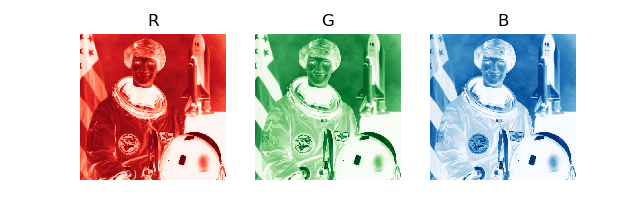

In [11]:
# Plot the three channels side by side using the `plot_images`:
hs.plot.plot_images(im, axes_decor="off", colorbar=False, label=["R", "G", "B"], cmap = ['Reds', 'Greens', 'Blues'])

We can index the navigation axes using the `inav` attribute, which will returns another signal.

For example, to obtain just the image in the first channel (R):

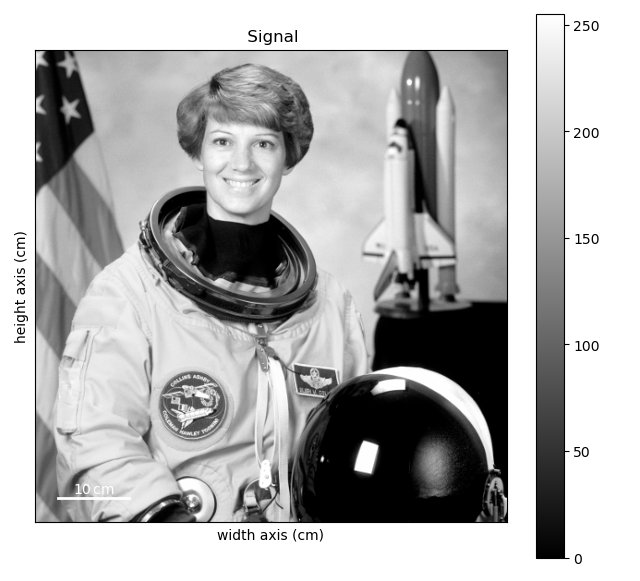

In [12]:
# Use the `inav` attribute "chained" with the `plot` method to plot only the first channel:
im.inav[0].plot()

A range of incides can be obtained using the `:` between the first and the last indices wanted. If the first or the last index isn't provided, hyperspy will ignore the first or the last, respectively

[<Axes: title={'center': ' (0,)'}, xlabel='width axis (cm)', ylabel='height axis (cm)'>,
 <Axes: title={'center': ' (1,)'}, xlabel='width axis (cm)', ylabel='height axis (cm)'>]

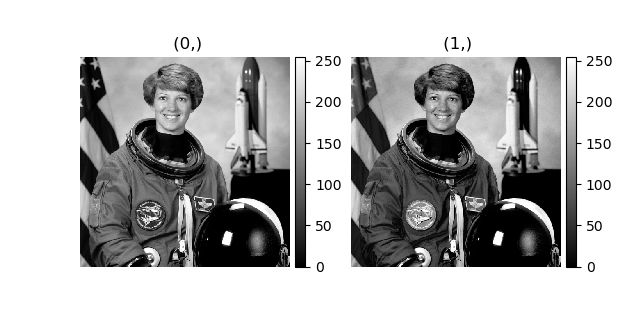

In [13]:
# Use the `plot_images` function to plot the two last channels:
hs.plot.plot_images(im.inav[1:3], axes_decor="off")

Negative indices are interpreted as counting from the end, so the following is an alternative syntax to obtain the last two channels:

[<Axes: title={'center': ' (0,)'}, xlabel='width axis (cm)', ylabel='height axis (cm)'>,
 <Axes: title={'center': ' (1,)'}, xlabel='width axis (cm)', ylabel='height axis (cm)'>]

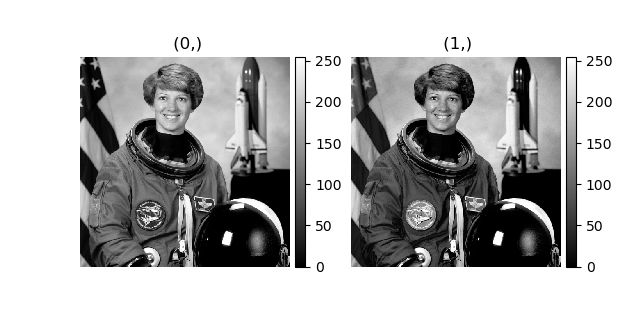

In [14]:
# Use negative indices indexing to plot the two last channels:
hs.plot.plot_images(im.inav[-2:], axes_decor='off')

Equivalently, we can use `isig` to index the signal axes

In [15]:
# Plot a small portion of the image (for example 128 to -128 and 0 to -256):
im.isig[128:-128, 0:-256].plot()

Like most other methods, `isig` and `inav` can be chained e.g.:

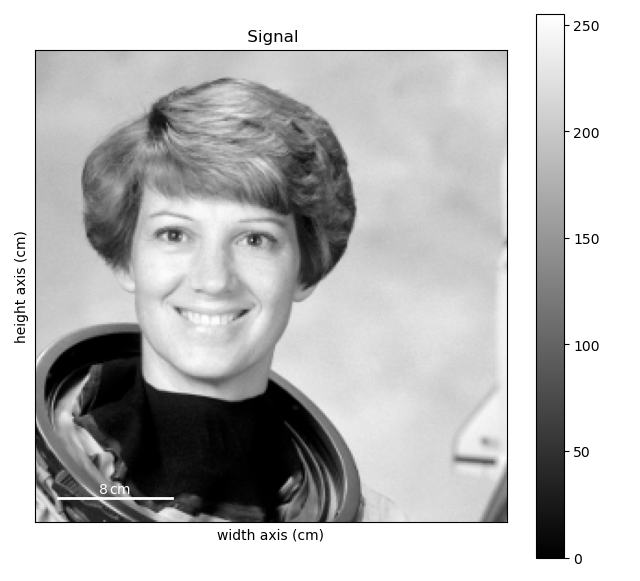

In [16]:
# Do the same as above with the first navigation index only:
im.inav[0].isig[128:-128, 0:-256].plot()

The image is calibrated in centimetres and the centre of the coordinates is located between the astronaut's eyes:

In [17]:
im.plot(axes_ticks=True)
im.add_marker(hs.plot.markers.Points([0, 0])) # Adds a "point" marker at the position (0, 0)

HyperSpy signals allow indexing using float numbers to index using the axes calibration instead of the data indices. For example:

In [18]:
# Use the float indexing syntax to plot a small portion of the image (e. g., -5.0 to 5.0 and -2.0 to 2.0):
im.isig[-5.0:5.0,-2.0:2.0].plot()

## 11. ROIs and interactive operations

For a more responsive interaction with plot, we will change the matplotlib backend from the `widget` to `qt`. To do this, the notebook needs to be restarted.

Fore more information on setting the matplotlib backend, see the first section of this tutorial on [importing HyperSpy](#1.-Importing-HyperSpy).

In [ ]:
# Restart kernel and the qt instead of the widget backend, since the responsiveness is better with qt:
%matplotlib widget
import hyperspy.api as hs

In [ ]:
# Reload the data
s_EELS = hs.load('005_EELS_SI_ap2_full range (dark ref corrected).dm3')
s_HAADF = hs.load('005_EELS_SI_15nm_HAADF_defect.dm3')

In [ ]:
# Plot `s_EELS`
s_EELS.plot()

In [ ]:
# Plot `s_HAADF`
s_HAADF.plot()

There are several types of regions of interest (ROI) available, and are available in `hs.roi`

In [ ]:
# List all ROIs available using the `dir` function:
dir(hs.roi)

In [ ]:
# Create a rectangular roi using `RectangularROI` and assign it to `roi_rectangle`
# Hint: remember to use built-in documentation to know what arguments are required:
#       as a default parameter, you can use: left=0.5, top=1.5, right=1.5, bottom=1.5:
roi_rectangle = hs.roi.RectangularROI(left=0.5, top=1.0, right=1.5, bottom=2.0)

This only creates the roi object and it isn't attached to any signal yet. To do so, plot the signal and use the `interactive` method of the roi object.

In [ ]:
# Add the `roi_rectangle` object to the plot of `s_EELS` by calling the `interactive` method of `roi_rectangle`:
s_EELS_roi = roi_rectangle.interactive(s_EELS)

The `interactive` method returns a signal *sliced* from `s_EELS`. It is designed to perform operations, which can be automatically updated when an event is triggered. By default it recomputes the operation when data or the axes of the original signal change.

In [ ]:
# Plot the signal defined by s_EELS_roi:
s_EELS_roi.plot()

This is slow because by default, some events are redundant and the same computation is repeated several times!
In this specific case, we can set the argument `recompute_out_event` to `None` to speed up the interactive operation:

In [ ]:
# Create another roi and name it `roi_fast`
# For example, you can use the parameters: left=1.0, top=1.5, right=1.6, bottom=2.1
roi_fast = hs.roi.RectangularROI(left=1.0, top=1.5, right=1.6, bottom=2.1)
# Add the `roi_fast` object to the plot of `s_EELS` but this time set `recompute_out_event` to `None` and 
# set the color of the roi to blue by using the `color` argument:
s_EELS_roi_fast = roi_fast.interactive(s_EELS, recompute_out_event=None, color='blue')

The same roi can also be added to several signals. For example, we can add the roi to the HAADF signal acquired simultaneously.

In [ ]:
# Add the `roi_fast` to the plot of `s_HAADF` by calling the `add_widgets` method of `roi_fast`:
roi_fast.add_widget(s_HAADF, color='blue')

It is possible to chain interactive operations: in the following, we take the sum of `s_EELS_roi` and 

In [ ]:
# Use the 'hs.interactive' function to interactively compute the sum of s_EELS_roi_fast 
# and assign its output to 's_EELS_roi_sum':
s_EELS_roi_fast_sum = hs.interactive(s_EELS_roi_fast.sum, recompute_out_event=None)

The plot of `s_EELS_roi_sum` is updated when one of the two rois is moved:

In [ ]:
s_EELS_roi_fast_sum

In [ ]:
# Plot `s_EELS_roi_sum`:
s_EELS_roi_fast_sum.plot()

## 12. Process with external function

**IMPORTANT:** Before you start this section, you need to generate the dataset by executing the code in the [Appendix](#Appendix).

The HyperSpy signals contain a number of methods that operate on their data. However, we often need to operate on the data using external functions. HyperSpy provides the `map` method to make it easy to apply external functions to multi-dimensional datasets.

We will use the previous RGB image to show how to apply the `rotate` function from `scipy.ndimage` to an RGB image. Lets import `rotate` and load the image:

In [ ]:
from scipy.ndimage import rotate
im = hs.load("astronaut.hspy")
im

Same as above, this image navigation size is 3 because the navigation axis corresponds to the three color channels, R, G and B.

`rotate` can operate on multidimensional images, but the rotation angle must be the same for all images. With HyperSpy we can easily specify the rotation angle for each image by creating a signal of the same navigation dimensions as `im` containing the rotation angle:

In [ ]:
angles = hs.signals.BaseSignal([-15, 0, 15])
angles

`angles` has the right size, but we need to swap the signal and navigation axes. We can do this using `transpose`:

In [ ]:
# Tranpose the data:
angles.transpose()

When no arguments are passed to transpose (as in this case) we can use the `T` shortcut instead:

In [ ]:
# Same as above using the `T` shortcut:
angles.T

The following uses the `map` method to rotate each color channel by a different angle using SciPy's `rotate` function:

In [ ]:
# Use the `map` method to rotate each channel using angles:
# Hint: check the documentation of the `rotate` function to check what parameters need to be passed to `map`. 
im.map(rotate,
       angle=angles.T,
       reshape=False,)

In [ ]:
# Plot `im` using `hs.plot.plot_images`:
hs.plot.plot_images(im, label=["R", "G", "B"], axes_decor="off", colorbar="single")

In [ ]:
# Convert `im` to a signal1D and store the results to `im_rgb`:
# Hint: find the corresponding function by inspecting the method of `im`.
im_rgb = im.to_signal1D()

To display the result in color we need to change the data type to `rgb8`:

In [ ]:
# Change the data type to "rgb8" and plot the signal:
im_rgb.change_dtype("rgb8")
im_rgb.plot()

Notice that now there are no navigation axes:

In [ ]:
# Check the shape of `im` converted to rgb:
im_rgb

## Appendix

### Create astronaut file for indexing example

In [ ]:
import hyperspy.api as hs
from skimage.data import astronaut
s = hs.signals.Signal1D(astronaut())

# Calibrate the image
s.axes_manager[0].name = "width"
s.axes_manager[0].scale = 0.13
s.axes_manager[0].offset = -29.2
s.axes_manager[0].units = "cm"

s.axes_manager[1].name = "height"
s.axes_manager[1].scale = 0.13
s.axes_manager[1].offset = -12.9
s.axes_manager[1].units = "cm"

s.axes_manager[2].name = "RGB"
s.to_signal2D().save("astronaut.hspy")